# ===================
# prefix.wfcファイルからデータを読み出す．
# 

In [48]:
# ===============
# wfcファイルの読み込み
# ===============

f = open('h2o_mol.wfc', 'r') #多分bohr単位 

# 
num_atom=3 #原子数
num_wan=4  #wfの数

datanum=[]
time=[]
wcs=[]
import numpy as np

datalist = f.readlines()
counter=0
for data in datalist:
    if counter%(num_wan+1)==0:
        datanum.append(int(data.split()[0]))
        time.append(float(data.split()[1]))
    elif counter%(num_wan+1)==1:
        w1=data.split()
        w1 = np.array([float(s) for s in w1])
    elif counter%(num_wan+1)==2:
        w2=data.split()
        w2 = np.array([float(s) for s in w2])
    elif counter%(num_wan+1)==3:
        w3=data.split()
        w3 = np.array([float(s) for s in w3])
    elif counter%(num_wan+1)==4:
        w4=data.split()
        w4 = np.array([float(s) for s in w4])
        wc=w1+w2+w3+w4
        wcs.append(wc)
    counter+=1

f.close()
print(np.array(wcs).shape)

(100, 3)


In [22]:
# ===============
# xyzの読み込み (after cppp.x)
# ===============

import numpy as np
unitcell_length=np.array([5.630846545,5.630846545,5.630846545]) # unitは?
test=np.tile(unitcell_length, (1, 300))

import mdtraj
# load_xyzの単位はangstromとのこと．
traj=mdtraj.load_xyz("./si_3/si_traj.xyz",top="./si_3/si_traj.pdb")
print(traj)
print(traj.unitcell_vectors)

import nglview as nv
view=nv.show_mdtraj(traj,gui=True)
view.parameters=dict(
    #density=1.02 #pyrimidine
    camera_type="orthographic",
    #background_color="white",
    clip_dist=0
)

view.clear_representations()
view.add_unitcell()
view.add_representation("ball+stick") #ball+stick
# view.update_unitcell()
# view.render_image()
# view._display_image()
view


<mdtraj.Trajectory with 300 frames, 8 atoms, 1 residues, without unitcells>
None


NGLWidget(max_frame=299)

In [21]:
import ase.io
test=ase.io.read("./si_3/si_traj.xyz")
from ase.visualize import view
view(test, viewer='ngl')


In [24]:
# ===============
# posの読み込み
# ===============

f = open('h2o_mol.pos', 'r') #多分bohr単位

#datanum=[]
time2=[]
pps=[]
import numpy as np

datalist = f.readlines()
counter=0
for data in datalist:
    if counter%(num_atom+1)==0:
        #datanum.append(int(data.split()[0]))
        time2.append(float(data.split()[1]))
    elif counter%(num_atom+1)==1:
        p1=data.split()
        p1 = np.array([float(s) for s in p1])
    elif counter%(num_atom+1)==2:
        p2=data.split()
        p2 = np.array([float(s) for s in p2])
    elif counter%(num_atom+1)==3:
        p3=data.split()
        p3 = np.array([float(s) for s in p3])
        pp=-6*p1-p2-p3
        pps.append(pp)
    counter+=1

f.close()

In [25]:
print(datanum)
print(np.array(time2).shape)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000]
(100,)


In [26]:
wcs=np.array(wcs)

In [27]:
pps=np.array(pps)
print(pps.shape)

(100, 3)


In [28]:
# dipole in e*bohr unit
dipole=pps+2*wcs

In [30]:
# 1 au ≒ 2.54 D

np.savetxt("time.txt", np.array(time), header="2022/07/08 test move ion")
np.savetxt("dipole.txt", 2.54*dipole, header="2022/07/08 test move ion in [D] ")

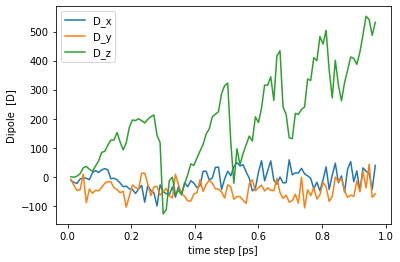

In [32]:
# プロット
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() # figure, axesオブジェクトを作成
ax.plot(np.array(time), 2.54*dipole[:,0], label="D_x")
ax.plot(np.array(time), 2.54*dipole[:,1], label="D_y")
ax.plot(np.array(time), 2.54*dipole[:,2], label="D_z")
ax.legend()
# ax.set_xlim(0.002,)
# ax.set_ylim(-2,2)
ax.set_xlabel("time step [ps]")
ax.set_ylabel("Dipole  [D]")

plt.show()



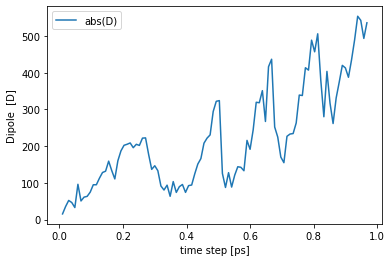

In [33]:
# プロット
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() # figure, axesオブジェクトを作成
ax.plot(np.array(time), 2.54*np.linalg.norm(dipole,axis=1), label="abs(D)")
ax.legend()
# ax.set_xlim(0.002,)
# ax.set_ylim(0,2)
ax.set_xlabel("time step [ps]")
ax.set_ylabel("Dipole  [D]")

plt.show()



(100, 3)


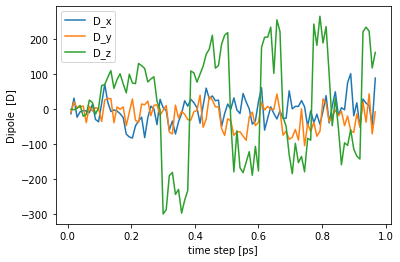

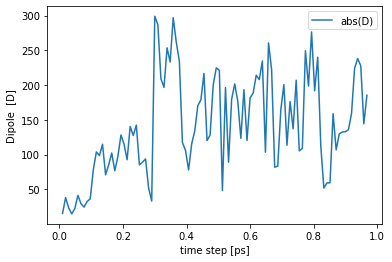

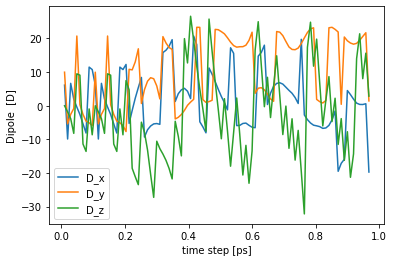

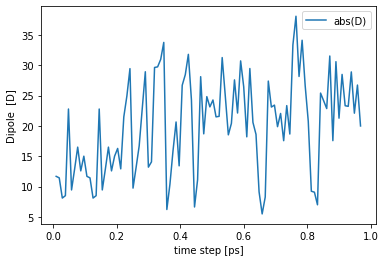

In [49]:

pps=[] # for Quantum
classic=[] # for classic
CM_h2o=[] # for CM of h2o
for i in range(100):
    tmp=traj.xyz[i]
    # print(" step  :: ", (tmp[0,:]+tmp[1,:]+tmp[2,:])*10*1.88973/3)
    pp1=-6*tmp[0,:]-tmp[1,:]-tmp[2,:] # ionic contribution to dipole-moment
    pp2=-0.82*tmp[0,:]+0.41*tmp[1,:]+0.41*tmp[2,:] # ionic contribution to dipole-moment
    pp3=tmp[0,:]+tmp[1,:]+tmp[2,:]
    pps.append(pp1)
    classic.append(pp2)
    CM_h2o.append(pp3)
pps=np.array(pps)*10*1.88973 # from nm to ang, then to bohr
classic=np.array(classic)*10*1.88973 # from nm to ang, then to bohr
CM_h2o=np.array(CM_h2o)*10*1.88973 # from nm to ang, then to bohr
print(pps.shape)

# dipole in e*bohr unit
dipole=pps+2*np.array(wcs)


# プロット
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() # figure, axesオブジェクトを作成
ax.plot(np.array(time), 2.54*dipole[:,0], label="D_x")
ax.plot(np.array(time), 2.54*dipole[:,1], label="D_y")
ax.plot(np.array(time), 2.54*dipole[:,2], label="D_z")
ax.legend()
# ax.set_xlim(0.002,)
# ax.set_ylim(-2,2)
ax.set_xlabel("time step [ps]")
ax.set_ylabel("Dipole  [D]")

plt.show()

# プロット
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() # figure, axesオブジェクトを作成
ax.plot(np.array(time), 2.54*np.linalg.norm(dipole,axis=1), label="abs(D)")
ax.legend()
# ax.set_xlim(0.002,)
# ax.set_ylim(0,2)
ax.set_xlabel("time step [ps]")
ax.set_ylabel("Dipole  [D]")

plt.show()



# プロット classic
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() # figure, axesオブジェクトを作成
ax.plot(np.array(time), 2.54*classic[:,0], label="D_x")
ax.plot(np.array(time), 2.54*classic[:,1], label="D_y")
ax.plot(np.array(time), 2.54*classic[:,2], label="D_z")
ax.legend()
# ax.set_xlim(0.002,)
# ax.set_ylim(-2,2)
ax.set_xlabel("time step [ps]")
ax.set_ylabel("Dipole  [D]")


# プロット classic
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() # figure, axesオブジェクトを作成
ax.plot(np.array(time), 2.54*np.linalg.norm(classic,axis=1), label="abs(D)")
ax.legend()
# ax.set_xlim(0.002,)
# ax.set_ylim(0,2)
ax.set_xlabel("time step [ps]")
ax.set_ylabel("Dipole  [D]")

plt.show()

Text(0, 0.5, 'CM  [bohr]')

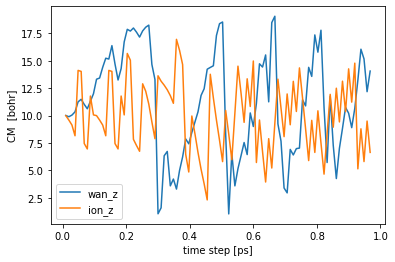

In [47]:
# ワニエセンターの図示


#CM=np.array(wcs)/4 # wannier center of mass
#CM_h2o=CM_h2o/3 # ion center of mass
# プロット
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() # figure, axesオブジェクトを作成
#ax.plot(np.array(time), CM[:,0], label="wan_x")
#ax.plot(np.array(time), CM[:,1], label="wan_y")
ax.plot(np.array(time), CM[:,2], label="wan_z")

#ax.plot(np.array(time), CM_h2o[:,0], label="ion_x")
#ax.plot(np.array(time), CM_h2o[:,1], label="ion_y")
ax.plot(np.array(time), CM_h2o[:,2], label="ion_z")
ax.legend()
# ax.set_xlim(0.002,)
# ax.set_ylim(-2,2)
ax.set_xlabel("time step [ps]")
ax.set_ylabel("CM  [bohr]")


array([[11.510323 , 12.372022 ,  9.994805 ],
       [ 5.9203897,  6.931104 ,  9.588247 ],
       [11.629055 ,  7.5624776,  9.134768 ],
       [10.576918 ,  7.951755 ,  8.155807 ],
       [10.046897 , 14.78244  , 14.123614 ],
       [ 9.553746 ,  8.207834 , 14.031803 ],
       [ 8.928716 ,  7.5617366,  7.4455075],
       [ 8.31763  ,  7.111719 ,  6.952656 ],
       [14.709942 ,  6.998516 , 11.783433 ],
       [14.546566 ,  6.8151402, 10.06033  ],
       [11.510323 , 12.372022 ,  9.994805 ],
       [ 5.9203897,  6.931104 ,  9.588247 ],
       [11.629055 ,  7.5624776,  9.134768 ],
       [10.576918 ,  7.951755 ,  8.155807 ],
       [10.046897 , 14.78244  , 14.123614 ],
       [ 9.553746 ,  8.207834 , 14.031803 ],
       [ 8.928716 ,  7.5617366,  7.4455075],
       [ 8.31763  ,  7.111719 ,  6.952656 ],
       [14.709942 ,  6.998516 , 11.783433 ],
       [14.546566 ,  6.8151402, 10.06033  ],
       [14.888089 ,  6.4160824, 15.671203 ],
       [ 8.960354 , 12.563886 , 15.055645 ],
       [ 9

In [12]:
# 
import ase
from ase.io import read, write
from ase.io.vasp import read_vasp_xdatcar

test=read_vasp_xdatcar("XDATCAR", index=0)
print(len(test))

# これはちゃんとリスト+Atomsの形式を認識している！！
from ase.visualize import view
view(test, viewer='ngl')


#import nglview as nv
#import ase.io
#w = nv.show_ase(test)
#w.add_label(radius=0.8,color="black",label_type="atom")

#w.clear_representations()
#w.add_label(radius=1,color="black",label_type="atom")
#view.add_representation("ball+stick")
#w.add_representation("ball+stick",selection=[i for i in range(0,n_atoms)],opacity=1.0)
#w.add_representation("ball+stick",selection=[i for i in range(n_atoms,total_atoms)],opacity=1,aspectRatio=2)
#w.add_unitcell()
#w.update_unitcell()
#w

50
